Mounting the drive
# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the dataset

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/EMR (1)/Patient_information_cleaned.csv')
df.head(10)

,LOG_ID,MRN,DISCH_DISP_C,DISCH_DISP,LOS,ICU_ADMIN_FLAG,SURGERY_DATE,BIRTH_DATE,WEIGHT,SEX,PRIMARY_ANES_TYPE_NM,ASA_RATING_C,ASA_RATING,PATIENT_CLASS_GROUP,PATIENT_CLASS_NM,OR_LOS_HOURS,AN_LOS_HOURS,HEIGHT_METRES,PRIMARY_PROCEDURE_NM_EMBEDDED
0,cd1636c6279d73a0,2e92522a5f2a2a22,15.0,16,1.0,0,2018-12-20,47,2832.47,0,2,3,5,1,1,4.97,4.97,1.68,[ 1.51651248e-03 9.81170982e-02 -2.86605567e-...
1,fc53c06ee2cfe438,b7a91e623d957d8f,16.0,17,21.0,1,2019-09-27,81,2515.01,1,2,3,5,1,1,1.58,1.58,1.68,[-1.0085398 0.01867253 -0.03251321 -0.843560...
2,2f0090c47da34608,b68d6c7198f30f73,15.0,16,3.0,1,2019-04-08,49,1964.74,0,2,2,3,0,0,4.08,4.08,1.68,[-2.08008103e-03 1.23408580e+00 -4.63137776e-...
3,6d3b621880c6ced4,46aa48e89b9c50e8,15.0,16,1.0,0,2018-12-03,54,2638.47,0,2,2,3,1,1,3.67,3.67,1.60,[ 1.66215926e-01 -6.18474707e-02 3.31903428e-...
4,82f89e10f2855420,c2756216cc89b795,15.0,16,1.0,0,2019-04-19,44,1880.08,0,2,2,3,1,1,6.63,6.63,1.68,[ 1.66215926e-01 -6.18474707e-02 3.31903428e-...
5,8778901eeb9b6166,2e34dcb0791b8c0d,15.0,16,1.0,0,2020-03-17,59,2640.00,0,2,2,3,1,1,2.02,2.02,1.68,[-2.30559930e-01 -2.06556216e-01 -2.16355667e-...
6,d56378d6b879a646,1e3abeb304c6dfbc,15.0,16,0.0,0,2019-11-20,56,3026.47,0,2,3,5,1,1,2.90,2.90,1.63,[-1.09382391e+00 -1.51855156e-01 -8.33968580e-...
7,91b48ef5ac2bb217,46c1f8933170ca25,15.0,16,1.0,0,2019-03-01,32,2927.71,0,2,2,3,1,1,6.07,6.07,1.68,[ 3.98092061e-01 -1.97260767e-01 -7.48087615e-...
8,1906cc82ba498914,ec65fcf9422707a0,15.0,16,0.0,0,2019-06-23,57,2169.33,0,2,2,3,1,1,1.12,1.12,1.68,[-1.84970791e-03 -6.10151768e-01 6.44230098e-...
9,a724284bc59fe51a,bfec22a4fe8ece9f,15.0,16,0.0,0,2019-01-15,60,3128.77,0,2,2,3,1,1,6.62,6.62,1.68,[ 1.66215926e-01 -6.18474707e-02 3.31903428e-...


# Checking for null values. Pertinent to mention is that the dataset has already been cleaned by us.

In [ ]:
print(df.isnull().sum())

LOG_ID                              0
MRN                                 0
DISCH_DISP_C                        0
DISCH_DISP                          0
LOS                                 0
ICU_ADMIN_FLAG                      0
SURGERY_DATE                        0
BIRTH_DATE                          0
WEIGHT                              0
SEX                                 0
PRIMARY_ANES_TYPE_NM                0
ASA_RATING_C                        0
ASA_RATING                          0
PATIENT_CLASS_GROUP                 0
PATIENT_CLASS_NM                    0
OR_LOS_HOURS                     1715
AN_LOS_HOURS                     1715
HEIGHT_METRES                       0
PRIMARY_PROCEDURE_NM_EMBEDDED       0
dtype: int64


# This Plot shows that Men tend to stay in the hospital for longer duration than Woman.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


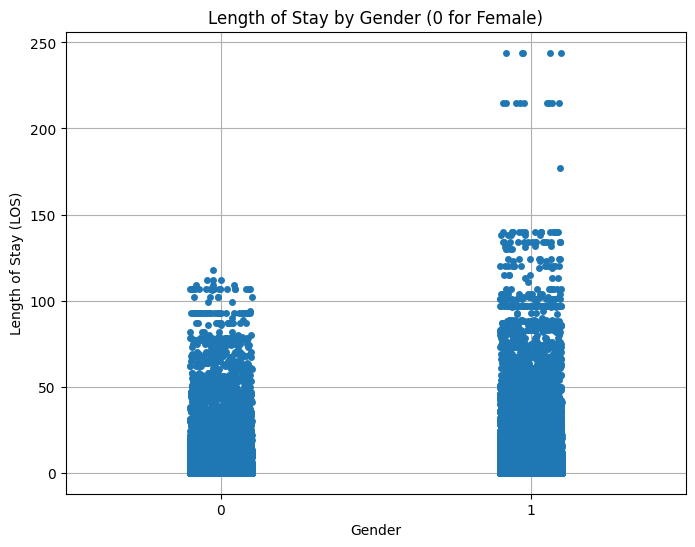

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.stripplot(x='SEX', y='LOS', data=df, jitter=True)
plt.title('Length of Stay by Gender (0 for Female)')
plt.xlabel('Gender')
plt.ylabel('Length of Stay (LOS)')
plt.grid(True)
plt.show()

# This Plot shows that patients administered with anesthesia type 3 and 4 are likely to stay longer in the hospital

<ipython-input-21-840a3f5b250f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='PRIMARY_ANES_TYPE_NM', y='LOS', data=df, ci=None)


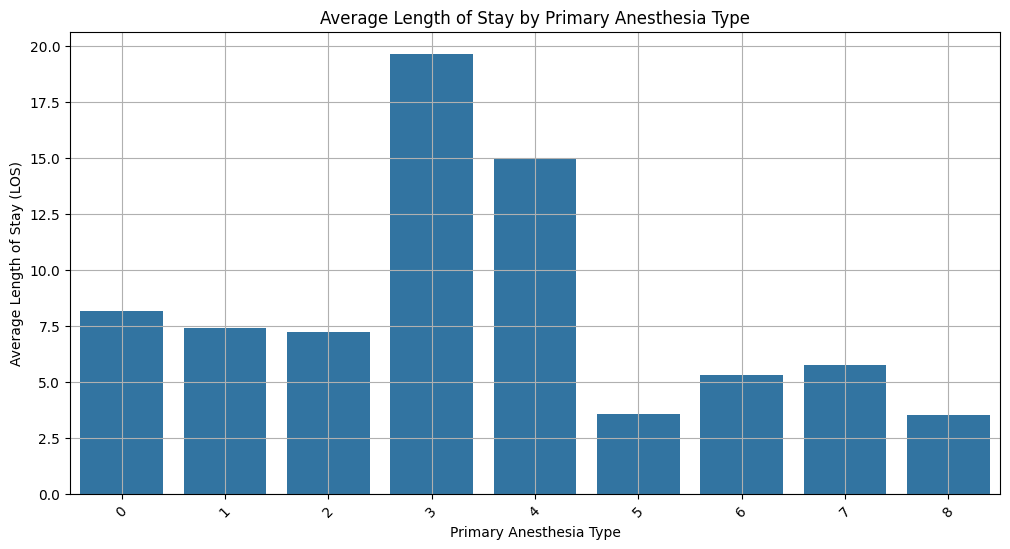

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='PRIMARY_ANES_TYPE_NM', y='LOS', data=df, ci=None)
plt.title('Average Length of Stay by Primary Anesthesia Type')
plt.xlabel('Primary Anesthesia Type')
plt.ylabel('Average Length of Stay (LOS)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# This plot shows that Patients who are older tend to have a higher ASA rating.
ASA is the assessment of a patient's health that helps predict the risk of complications during surgery.

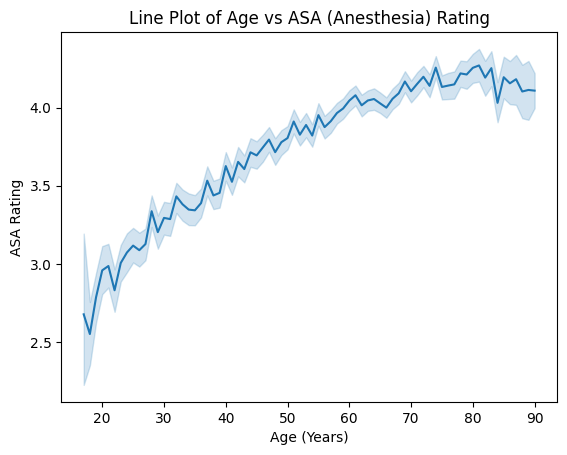

In [ ]:
sns.lineplot(x='BIRTH_DATE', y='ASA_RATING', data=df)
plt.title('Line Plot of Age vs ASA (Anesthesia) Rating')
plt.xlabel('Age (Years)')
plt.ylabel('ASA Rating')

plt.show()


# This plots shows that patients who are admitted to ICU tend to stay hospitalised for longer duration.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


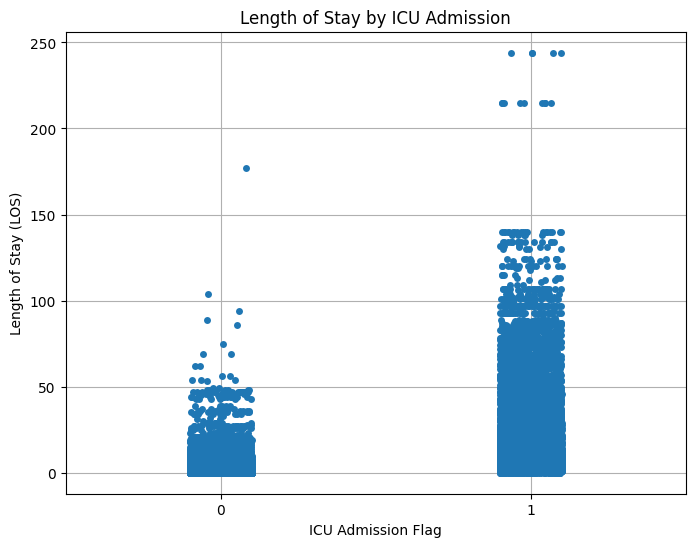

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.stripplot(x='ICU_ADMIN_FLAG', y='LOS', data=df, jitter=True)
plt.title('Length of Stay by ICU Admission')
plt.xlabel('ICU Admission Flag')
plt.ylabel('Length of Stay (LOS)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
for column in ['BIRTH_DATE', 'AN_LOS_HOURS', 'LOS']:
    print(f'Descriptive statistics for {column}:')
    print(df[column].describe())
    print(f'Mode: {df[column].mode()[0]}')
    print(f'Skewness: {df[column].skew()}')
    print(f'Kurtosis: {df[column].kurtosis()}\n')


Descriptive statistics for BIRTH_DATE:
count    57782.000000
mean        54.836160
std         17.584194
min         17.000000
25%         41.000000
50%         57.000000
75%         68.000000
max         90.000000
Name: BIRTH_DATE, dtype: float64
Mode: 65
Skewness: -0.18044764500970012
Kurtosis: -0.842712345728958

Descriptive statistics for AN_LOS_HOURS:
count    56067.000000
mean         3.418269
std          2.339310
min        -16.320000
25%          1.770000
50%          2.800000
75%          4.420000
max         27.920000
Name: AN_LOS_HOURS, dtype: float64
Mode: 1.8
Skewness: 1.9121171543488762
Kurtosis: 6.290016866374248

Descriptive statistics for LOS:
count    57782.000000
mean         6.993977
std         13.757746
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max        244.000000
Name: LOS, dtype: float64
Mode: 0.0
Skewness: 4.858248996608513
Kurtosis: 36.93083840072746



In [ ]:
# BIRTH_DATE is the Age
results = {
    'BIRTH_DATE': {
        'Variance': df['BIRTH_DATE'].var(),
        'Standard Deviation': df['BIRTH_DATE'].std(),
        'Interquartile Range': df['BIRTH_DATE'].quantile(0.75) - df['BIRTH_DATE'].quantile(0.25)
    },
    'AN_LOS_HOURS': {
        'Variance': df['AN_LOS_HOURS'].var(),
        'Standard Deviation': df['AN_LOS_HOURS'].std(),
        'Interquartile Range': df['AN_LOS_HOURS'].quantile(0.75) - df['AN_LOS_HOURS'].quantile(0.25)
    },
    'LOS': {
        'Variance': df['LOS'].var(),
        'Standard Deviation': df['LOS'].std(),
        'Interquartile Range': df['LOS'].quantile(0.75) - df['LOS'].quantile(0.25)
    }
}

for column, stats in results.items():
    print(f'{column}:')
    for stat_name, value in stats.items():
        print(f'  {stat_name}: {value}')

BIRTH_DATE:
  Variance: 309.20388929218325
  Standard Deviation: 17.58419430318555
  Interquartile Range: 27.0
AN_LOS_HOURS:
  Variance: 5.472372078962356
  Standard Deviation: 2.3393101716023796
  Interquartile Range: 2.65
LOS:
  Variance: 189.275573356593
  Standard Deviation: 13.757745940254638
  Interquartile Range: 7.0


The strongest correlation is between WEIGHT and HEIGHT_METRES (0.43), which is a moderate positive correlation.
The other variables show weak or negligible correlations, with values close to 0.

<Axes: >

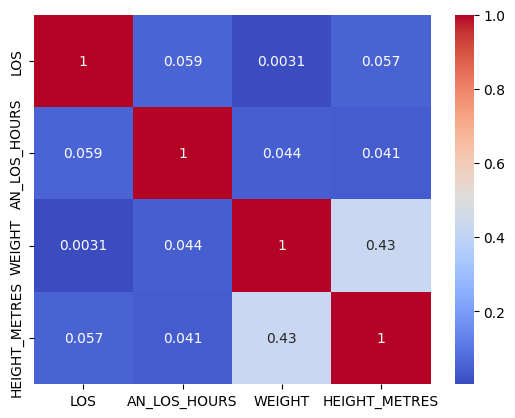

In [ ]:
corr = df[['LOS', 'AN_LOS_HOURS', 'WEIGHT', 'HEIGHT_METRES']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

KeyError: Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64', name='PRIMARY_ANES_TYPE_NM')